In [2]:
%matplotlib inline

Hello everyone! My name is Amit Saha and today I am going to talk about "Doing Math with Python".

Thank you for registering for the webcast and making time for this. Hopefully, you will find it useful. 

A bit about me - I am a software engineer at Freelancer.com in Sydney Australia.  I am the author of the book "Doing Math with Python" published by No Starch Press in 2015. I also write for Linux Voice and other Linux magazines. 

There is a link to my blog, twitter, etc. so, if you want to learn more about my work or get in touch, those are the means to do so.

# Book: Doing Math With Python



- Most of what I am going to discuss today

- In addition: Descriptive statistics, Sets and Probability, Random numbers

Published by [No Starch Press](https://www.nostarch.com/doingmathwithpython) in August, 2015.

*Upcoming/In-progress translations*: Simplified Chinese, Japanese, French and Korean.

# Why "Math with Python?"

In this webcast, I am presenting an idea, a hypothesis or even making a statement - Python can lead to a more enriching learning and teaching experience in the classroom.

Let me explain where I am coming from. When I think back about when I was learning to program and learning all other subjects in standards 7-10. I think it's true today as well. Programming and other subjects such as Math, Science are taught in a disconnected fashion. Programming seems to be all about finding the sum of a series or generating fibonacci numbers. Make no mistake, these exercises are what builds up the programming logic. Some students get really excited about being able to do these, but a lot of them don't.  It's a lot like not everyone gets interested in solving puzzles - i don't, i never took to them.

I think I know of a way we could excite more students! Show them how you can write programs to do your homework, or experiment without having to go the science lab or setup elaborate experimental setups. This is my goal for today - in the following slides and notebooks, I will hypothesise on a way of connecting Python programming and other subjects. That will show that programming is a way to get real work done, not something to learn for the sake of it.



# How?

We need some tools to help us on our quest. The Python community has some giant shoulders we can stand upon - Python 3, SymPy and matplotlib.

We will see how we can use the Python programming language in three different capacities to explore Math.



# Scientific calculator

Who uses Python as a calculator? I do! Specifically, I use Python 3 because of 1/2=0 messes up my monthly expenditure calculation. Besides the usual addition and subtraction, we have of course the [math](https://docs.python.org/3/library/math.html) module and more recently the [statistics](https://docs.python.org/3/library/statistics.html) module which makes Python a worthy scientific calculator.


- `fabs()`, `abs()`, `sin()`, `cos()`, `gcd()`, `log()` and more (See [math](https://docs.python.org/3/library/math.html))

- Descriptive statistics (See [statistics](https://docs.python.org/3/library/statistics.html#module-statistics))


- Develop your own functions: unit conversion, finding correlation, .., anything really

- Use PYTHONSTARTUP to extend the battery of readily available mathematical functions


But then, there's more! You are not limited to the functions from those libraries, you can write your own custom functions and make them available whenever you start your Python interpreter. How?

Use PYTHONSTARTUP!

```python
$ PYTHONSTARTUP=~/work/dmwp/oreilly-webcast-2016/startup_math.py idle3 -s
```




#### Unit conversion functions

```python

>>> unit_conversion()
1. Kilometers to Miles
2. Miles to Kilometers
3. Kilograms to Pounds
4. Pounds to Kilograms
5. Celsius to Fahrenheit
6. Fahrenheit to Celsius
Which conversion would you like to do? 6
Enter temperature in fahrenheit: 98
Temperature in celsius: 36.66666666666667
>>> 

```

#### Finding linear correlation

```python
>>> 
>>> x = [1, 2, 3, 4]
>>> y = [2, 4, 6.1, 7.9]
>>> find_corr_x_y(x, y)
0.9995411791453812

```

# Really awesome Calculator

So, that was Python and it's standard libraries. When you bring in third party libraries to the mix, Python becomes a seriously fancy calculator.

[SymPy](http://www.sympy.org/en/index.html) - a pure Python symbolic math library

You can give it algebraic expressions to a function and a graph will be created for you.

You can give an equation and out comes the solutions for that equation.

We can even solve calculus problems.

Let's see a few examples.

Enter an expression in x to graph: 2*x**2 + sin(x)


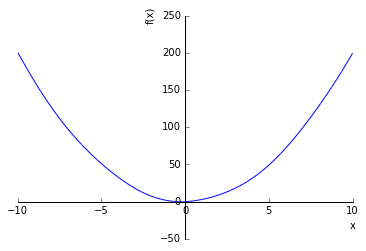

In [3]:
# Create graphs from algebraic expressions

from sympy import Symbol, plot
x = Symbol('x')
expr = input('Enter an expression in x to graph: ')
p = plot(expr)


In [13]:
# Solve equations

from sympy import solve, Symbol
x = Symbol('x')
solve(2*x + 1)


[-1/2]

In [1]:
# Solve inequalities
'''
isolve.py

Single variable inequality solver
'''

from sympy import Symbol, sympify, SympifyError
from sympy import solve_poly_inequality, solve_rational_inequalities
from sympy import solve_univariate_inequality, Poly
from sympy.core.relational import Relational, Equality

def isolve(ineq_obj):
    x = Symbol('x')

    expr = ineq_obj.lhs
    rel = ineq_obj.rel_op
    
    if expr.is_polynomial():
        p = Poly(expr, x)
        return solve_poly_inequality(p, rel)
    elif expr.is_rational_function():
        p1, p2 = expr.as_numer_denom()
        num  = Poly(p1)
        denom = Poly(p2)
        return solve_rational_inequalities([[((num, denom), rel)]])
    else:
        return solve_univariate_inequality(ineq_obj , x, relational=False)

ineq = input('Enter the inequality to solve: ')
try:
    ineq_obj = sympify(ineq)
except SympifyError:
    print('Invalid inequality')
else:
    # We check if the input expression is an inequality here
    if isinstance(ineq_obj, Relational) and not isinstance(ineq_obj, Equality):
        print(isolve(ineq_obj))
    else:
        print('Invalid inequality')

Enter the inequality to solve: 2*x + 1 < 0
[(-oo, -1/2)]


In [24]:
# Limits

from sympy import Symbol, Limit, sin
x = Symbol('x')
Limit(sin(x)/x, x, 0).doit()




1

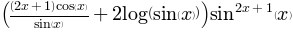

In [2]:
# Derivative

from sympy import Symbol, Derivative, sin, init_printing
x = Symbol('x')
init_printing()
Derivative(sin(x)**(2*x+1), x).doit()

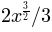

In [16]:
# Indefinite integral

from sympy import Symbol, Integral, sqrt, sin, init_printing
x = Symbol('x')
init_printing()
Integral(sqrt(x)).doit()

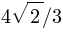

In [19]:
# Definite integral

from sympy import Symbol, Integral, sqrt
x = Symbol('x')
Integral(sqrt(x), (x, 0, 2)).doit()

I will pause for a moment now. We have seen how Python can be a super awesome calculator. What does that buy us? We have now been able to show that you can make computer programs literally do your homework. Write a program to do your work once and you will never have to make those lengthy calculations yourselves. Can we use Python to do more? 

Let's continue.

<center><h1>Can we do more than write smart calculators?</h1></center>




# More than smart calculators

Our tools
 
- matplotlib

- basemap

- Interactive Jupyter Notebooks


Python can be more than a super powerful calculator. We can use it to enhance the learning experience of other subjects. Next, I have three examples including a demo. 

First up, a video of a projectile motion. This program uses matplotlib's animation API to create a basic animation of a projectile motion - a fairly common subject introduced in introductory Physics. The program which is linked asks for the angle of projection and speed and then draws the trajectory of the projectile. Just by running the program multiple times, we can see how the trajectory changes. We don't have to go outside and start throwing balls..

Next, we will put Jupyter Notebook's interactive widgets to good effect by drawing a Barnsley Fern. Let's see how the demo goes.

Next, with the help of basemap, we can draw places on a world map like we would draw points on a graph paper.

I know I would be excited if someone was showing me all these cool things when I was learning these things!


##### Bringing Science to life

*Animation of a Projectile motion* [(Python Source)](https://github.com/doingmathwithpython/oreilly-webcast-2016/blob/master/py-files/projectile_animation.py)




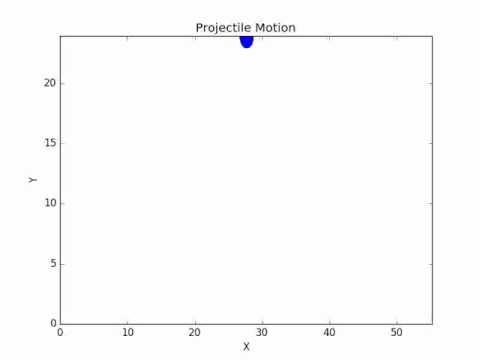

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("8uWRVh58KdQ")

##### Exploring Fractals in Nature

*Interactively drawing a Barnsley Fern* [(Notebook)](https://github.com/doingmathwithpython/oreilly-webcast-2016/blob/master/demos/Interactive%20Barnsley%20Fern.ipynb)




##### The world is your graph paper

*Showing places on a digital map* [(Notebook)](https://github.com/doingmathwithpython/oreilly-webcast-2016/blob/master/demos/Maps%20using%20Basemap%20-%20demo.ipynb)

Okay, so that's great. We have successfully used Python to make the learning experience of young learners more fun and immediately applicable. Can we derive more benefit from doing that? Like something for the future? We all love doing things for the future, don't we?

I think yes, i think if we teach young learners the things we have discussed today, it is a great base for someone wanting to go into data science or machine learning.

Statistics and visualising data are two very key factors of data science.

Differential calculus and specifically the gradient descent method is a simple but useful optimization method used in Machine Learning. Let's see a demo of using gradient descent to find the minimum value of a function.

Now, let's apply gradient descent as an optimizer in a Linear Regression problem.

# Great base for the future

*Statistics and Graphing data* -> *Data Science*

*Differential Calculus* -> *Machine learning*


### Application of differentiation

Use gradient descent to find a function's minimum value [(Notebook)](https://github.com/doingmathwithpython/oreilly-webcast-2016/blob/master/demos/Gradient%20Descent.ipynb)

### Predict the college admission score based on high school math score

Use gradient descent as the optimizer for single variable linear regression model [(Notebook)](https://github.com/doingmathwithpython/oreilly-webcast-2016/blob/master/demos/Simple%20Linear%20Regression.ipynb)



## Advanced libraries

- [scipy](https://scipy.org)

- [numpy](http://www.numpy.org/)

- [scikit-learn](http://scikit-learn.org/stable/)

- [pandas](http://pandas.pydata.org/)

- [Statsmodels](http://statsmodels.sourceforge.net/)



And in the end, I would like to talk about my book "Doing Math with Python". My idea was attractive enough to get it published by No Starch Press which makes me hope that I am probably onto something. I discuss all of the topics I discuss today in my talk. In addition, I discuss sets, probability and random numbers and descriptive statistics.

It's being translated into several non-English languages.

The reviews/feedback so far has been really positive. I don't have any first hand involvement in teaching, so it's very appreciative of people to share their viewpoints with me.

#### Comments on "Doing Math with Python"


> Saha does an excellent job providing a clear link between Python and upper-level math concepts, and demonstrates how Python can be transformed into a mathematical stage. This book deserves a spot on every geometry teacher’s bookshelf.



> Outstanding guide to using Python to do maths. Working back through my undergrad maths using Python.



> Saha does an excellent job providing a clear link between Python and upper-level math concepts, and demonstrates how Python can be transformed into a mathematical stage.


> This book is highly recommended for the high school or college student and anyone who is looking for a more natural way of programming math and scientific functions

> As a teacher I highly recommend this book as a way to work with someone in learning both math and programming



# Dialogue

- [Doing Math with Python](http://doingmathwithpython.github.io/)

- Twitter: @echorand

- Email: amitsaha.in@gmail.com
    
